# Conexão com postgres e Relatorios do Sistema

## Instalando biblioteca de acesso com postgres e manipulação de dados e gráficos

In [3]:
!pip install --user psycopg2-binary
!pip install --user seaborn
!pip install --user pandas

     |████████████████████████████████| 2.9MB 5.0MB/s 


### Importando bibliotecas

In [4]:
import seaborn as sns
import pandas as pd
import psycopg2

/usr/local/lib/python3.6/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


### Usando psycopg2 para configurar conexão

In [0]:
conn = psycopg2.connect(host="raja.db.elephantsql.com",database="diqiafqu", user="diqiafqu", password="a-9_Rq0HLC83LOfRCP6EHRbym05YRIks")

## Obtendo dados do database com Pandas

# Relatório 1

### Objetivo: Objeter o volume atual das lixeiras que informe: ID da lixeira, data e hora da última manutenção


Código para obtenção do resultado:

In [0]:
relatorio1 = pd.read_sql_query("""
                            select distinct(lixeira.id_lixeira) as "Id", lixeira.nome_lixo as "lixeira", nv_lixo.id_nv_lixo as "id_nv_lixo", nv_lixo.tipo_nv_lixo as "nv_lixo", manutencao_chamado.data as "data_manutencao", manutencao_chamado.hora as "hora_manutencao" from lixeira
inner join manutencao_chamado on (lixeira.fk_nv_lixo_id_nv_lixo = manutencao_chamado.fk_lixeira_id_lixeira)
inner join nv_lixo on (lixeira.fk_nv_lixo_id_nv_lixo = nv_lixo.id_nv_lixo)
order by manutencao_chamado."data" desc;
                            """,conn)

In [35]:
relatorio1

,Id,lixeira,id_nv_lixo,nv_lixo,data_manutencao,hora_manutencao
0,13,Churrasqueira 1,1,meio_vazio,2019-12-10,10:02:10
1,20,Bosque,1,meio_vazio,2019-12-10,10:02:10
2,14,Churrasqueira 2,4,cheio,2019-06-22,10:52:02
3,19,Jardim 2,4,cheio,2019-06-22,10:52:02
4,12,Condominio 2,2,meio,2018-03-20,10:22:00
5,18,Jardim,2,meio,2018-03-20,10:22:00
6,21,Salão de Festas 2,2,meio,2018-03-20,10:22:00
7,15,Churrasqueira 3,3,meio_cheio,2017-05-15,10:32:00
8,16,Churrasqueira 4,3,meio_cheio,2017-05-15,10:32:00
9,17,Área comum,3,meio_cheio,2017-05-15,10:32:00


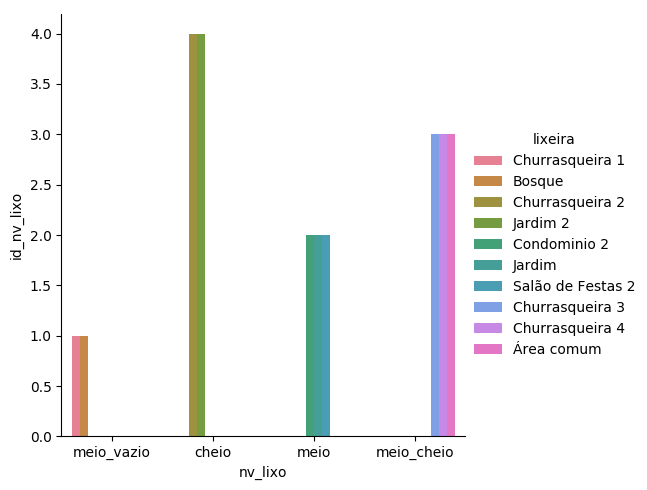

In [37]:

df = relatorio1
sns.catplot(x="nv_lixo", y="id_nv_lixo", hue="lixeira", data=df, kind="bar", palette= "husl",)

# Relatorio 2

### Objetivo: Obter a quantidade de lixeiras disponíveis para descarte

codigo para obtenção do resultado:

In [0]:
relatorio2 = pd.read_sql_query("""
                            select situacao.tipo_situacao as "situacao", count(lixeira.id_lixeira) as "quantidade" from lixeira
inner join nv_lixo on (lixeira.fk_nv_lixo_id_nv_lixo = nv_lixo.id_nv_lixo)
inner join situacao on (lixeira.fk_situacao_id_situacao = situacao.id_situacao)
where nv_lixo.id_nv_lixo < 4
group by situacao.tipo_situacao;

                            """,conn)

In [49]:
relatorio2

,situacao,quantidade
0,operante,8
1,inoperante,11


Alternativamente podemos aplicar estilos a tabela para melhor formatação usando pandas e seaborn

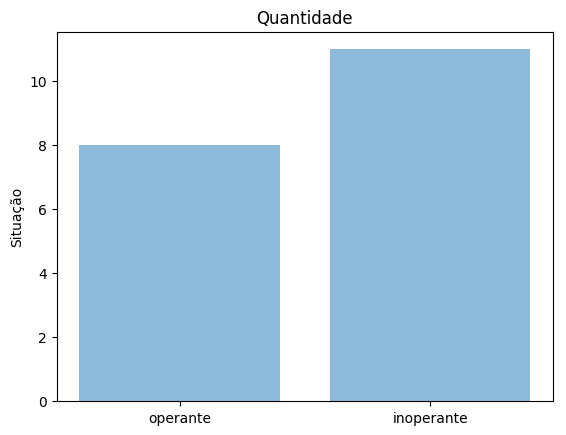

In [50]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
df=relatorio2
objects = tuple(df.situacao)
y_pos = np.arange(len(objects))
performance = list(df.quantidade)
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Situação')
plt.title('Quantidade')
 
plt.show()

## Relatório 3

### Objetivo: Lixeiras que atingiram nível igual ou superior a 70% da capacidade máxima que informe: código e nível de preenchimento das lixeiras

codigo para obtenção do resultado:

In [0]:
relatorio3 = pd.read_sql_query("""
                            select situacao.tipo_situacao as "situacao", count(lixeira.id_lixeira) as "quantidade" from lixeira
inner join nv_lixo on (lixeira.fk_nv_lixo_id_nv_lixo = nv_lixo.id_nv_lixo)
inner join situacao on (lixeira.fk_situacao_id_situacao = situacao.id_situacao)
where nv_lixo.id_nv_lixo = 4
group by situacao.tipo_situacao;
                            """,conn)

In [52]:
relatorio3

,situacao,quantidade
0,operante,2


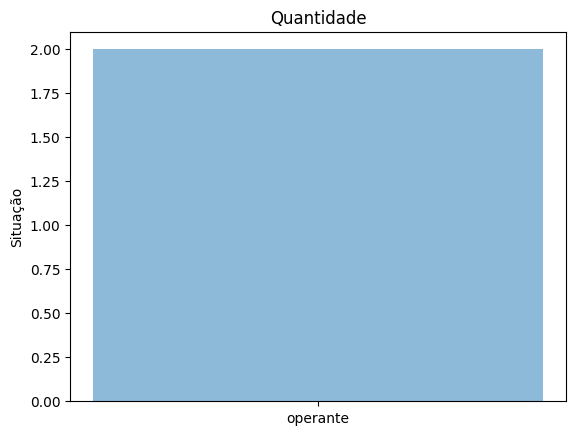

In [54]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
df=relatorio3
objects = tuple(df.situacao)
y_pos = np.arange(len(objects))
performance = list(df.quantidade)
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Situação')
plt.title('Quantidade')
 
plt.show()

## Relatório 4

### Objetivo: Quantidade das manutenções das lixeiras, informando quantas vezes teve problemas;

codigo para obtenção do resultado:

In [0]:
relatorio4 = pd.read_sql_query("""
                            select lixeira.nome_lixo as "lixeira", count(manutencao_chamado.id_manutencao) as "quantidade" from lixeira
inner join manutencao_chamado on (lixeira.id_lixeira = manutencao_chamado.fk_lixeira_id_lixeira)
group by lixeira.nome_lixo;
                            """,conn)

In [59]:
relatorio4

,lixeira,quantidade
0,Garagem,1
1,Salão de Festas,1
2,Garagem 2,1
3,Condominio 1,1
4,Area de Festas,1
5,Quadra,1
6,Garagem 4,1
7,Piscina,1
8,Garagem 3,1
9,Salão de Festas 2,1


Text(0.5, 1.0, 'Lixeiras')

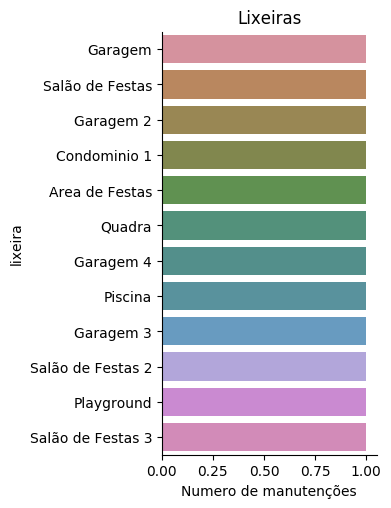

In [60]:
df = relatorio4

sns.catplot(x="quantidade", y="lixeira",
                data=df, saturation=.5,
                kind="bar", ci=None, aspect=.8, palette= "husl")
plt.xlabel('Numero de manutenções')
plt.title('Lixeiras')

# Relatório 5

### Objetivo: Situação operante das lixeiras

codigo para obtenção do resultado:

In [0]:
relatorio5 = pd.read_sql_query("""
                            select situacao.tipo_situacao as "situacao", count(lixeira.id_lixeira) as "quantidade" from lixeira
inner join nv_lixo on (lixeira.fk_nv_lixo_id_nv_lixo = nv_lixo.id_nv_lixo)
inner join situacao on (lixeira.fk_situacao_id_situacao = situacao.id_situacao)
group by situacao.tipo_situacao;
                            """,conn)

In [65]:
relatorio5

,situacao,quantidade
0,operante,10
1,inoperante,11


Text(0.5, 9.444444444444438, 'Situação')

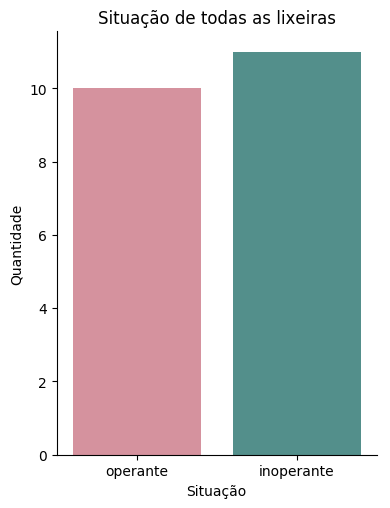

In [67]:
df = relatorio5;

current_palette = sns.color_palette()

sns.catplot(x="situacao", y="quantidade",
                data=df, saturation=.5,
                kind="bar", ci=None, aspect=.8, palette= "husl");
plt.title('Situação de todas as lixeiras')
plt.ylabel('Quantidade')
plt.xlabel('Situação')

# Referencias

https://pandas.pydata.org/pandas-docs/stable/style.html <br>
https://pythonspot.com/matplotlib-bar-chart/<br>
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html <br>